In [ ]:
import numpy as np

def levenshtein(seq1, seq2):  
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in xrange(size_x):
        matrix [x, 0] = x
    for y in xrange(size_y):
        matrix [0, y] = y

    for x in xrange(1, size_x):
        for y in xrange(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    print (matrix)
    return (matrix[size_x - 1, size_y - 1])

if __name__=='__main__':
    print levenshtein('test', 'toast')

In [40]:
# tic-tac-toe minimax

def chkwin(bl,p): # check for win for board list
    for i in range(0,6,3):
        if bl[i]==p and bl[i+1]==p and bl[i+2]==p:
            return True
    for i in range(3):
        if bl[i]==p and bl[i+3]==p and bl[i+6]==p:
            return True
    if bl[0]==p and bl[4]==p and bl[8]==p:
            return True
    if bl[2]==p and bl[4]==p and bl[6]==p:
            return True
    return False

def otherp(p):
    if p==1:
        return 2
    return 1

def mvopt(bl): # returns movement options for current board state
    res = []
    for i in range(len(bl)):
        if bl[i]==0:
            res.append(i)
    return res

def plyrmv(bl,i,p): # next player move
    return [x if ind != i else p for ind, x in enumerate(bl)]

def successors(bl,p): # return all successor board states
    mo = mvopt(bl)
    succs = []
    for o in mo:
        succs.append([0,plyrmv(bl,o,p)]) # [value=0 (default utility), state]
    return succs

def util(bl,p): # return utility of current board for player p
    if chkwin(bl,p):
        return 1
    elif chkwin(bl,otherp(p)):
        return -1
    return 0

def maxval(bl,p): # determine the max-value for player p
    tt = util(bl,p)
    if tt != 0:
        return [tt,bl]
    v = [-1000,bl]
    succs = successors(bl,p)
    for s in succs:
        miv = minval(s[1],p)
        if miv[0] > v[0]:
            v = miv
    return v

def minval(bl,p): # determine the min-value for player p
    tt = util(bl,p)
    if tt != 0:
        return [tt,bl]
    v = [1000,bl]
    succs = successors(bl,otherp(p))
    for s in succs:
        mav = maxval(s[1],p)
        if mav[0] < v[0]:
            v = mav
    return v

def minimaxdec(bl,p): # minimax decision player p
    v = maxval(bl,p)
    return v

if __name__=='__main__':
    brd = [2,0,1,1,0,0,1,2,2]
    print minimaxdec(brd,1)

[1, [2, 0, 1, 1, 1, 0, 1, 2, 2]]


In [1]:
# dot test
import numpy as np

vec0 = np.array([[1], [2]])
vec1 = np.array([[1, 2]])

print np.dot(vec0, vec1)

[[1 2]
 [2 4]]


In [1]:
# Haiku generator
from random import randint

wordList1 = ["berauschend", "erstaunlich", "farbenfroh", "entzückend", "zarteste"]
wordList2 = ["Visionen", "Entfernung", "Gewissen", "Prozess", "Chaos"]
wordList3 = ["abergläubisch", "kontrastierend", "anmutig", "einladend", "widersprüchlich", "überwältigend"]
wordList4 = ["wahrer", "dunkler", "kalter", "warmer", "heller"]
wordList5 = ["Landschaft", "Jahreszeit", "Farben", "Licht", "Frühling", "Winter", "Sommer", "Herbst"]
wordList6 = ["unbestreitbare", "schöne", "unersetzliche", "unglaubliche", "unwiderrufliche"]
wordList7 = ["Inspiration", "Phantasie", "Weisheit", "Gedanken"]

wordIndex1=randint(0, len(wordList1)-1)
wordIndex2=randint(0, len(wordList2)-1)
wordIndex3=randint(0, len(wordList3)-1)
wordIndex4=randint(0, len(wordList4)-1)
wordIndex5=randint(0, len(wordList5)-1)
wordIndex6=randint(0, len(wordList6)-1)
wordIndex7=randint(0, len(wordList7)-1)

haiku = wordList1[wordIndex1] + " " + wordList2[wordIndex2] + ",\n" 
haiku = haiku + wordList3[wordIndex3] + " " + wordList4[wordIndex4] + " " + wordList5[wordIndex5]  + ",\n"
haiku = haiku + wordList6[wordIndex6] + " " + wordList7[wordIndex7] + "."

print(haiku)

entzückend Chaos,
kontrastierend kalter Landschaft,
unersetzliche Phantasie.


In [23]:
# matrix tests (against corresponding C-code)
import numpy as np

h = np.array([[1.,1.,1.,1.], [1.,1.,1.,1.], [1.,1.,1.,1.]])
dWz = np.array([[1.,1.,1.], [1.,1.,1.], [1.,1.,1.]])
dz = np.array([[1.,1.,1.]])
x = np.array([[1.],[1.],[1.]])

print h
print dWz
print np.dot(dWz.T, x)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[3.]
 [3.]
 [3.]]


In [2]:
zip([1,2,3], ['a', 'b', 'c'], [1,2,3])

[(1, 'a', 1), (2, 'b', 2), (3, 'c', 3)]

In [3]:
 
import math
 
def mandelbrot(z , c , n=40):
    if abs(z) > 1000:
        return float("nan")
    elif n > 0:
        return mandelbrot(z ** 2 + c, c, n - 1) 
    else:
        return z ** 2 + c
 
print("\n".join(["".join(["#" if not math.isnan(mandelbrot(0, x + 1j * y).real) else " "
                 for x in [a * 0.02 for a in range(-80, 30)]]) 
                 for y in [a * 0.05 for a in range(-20, 20)]])
     )
 

                                                                                #                             
                                                                                                              
                                                                                                              
                                                                       #  ##                                  
                                                                     ###########                              
                                                                    ############                              
                                                                     ##########                               
                                                            ##   # ############  # #   #                      
                                                    ###### # ########################### #                    
 

In [4]:
# a series

def sn(sn1, n):
    if sn1<n:
        return sn1+n
    return sn1-n

if __name__=='__main__':
    sn1 = 1
    for n in range(2,5000):
        sn1 = sn(sn1,n)
        if sn1 == 0:
            print 'n: %d -> Sn: %d' % (n, sn1)

n: 3 -> Sn: 0
n: 12 -> Sn: 0
n: 39 -> Sn: 0
n: 120 -> Sn: 0
n: 363 -> Sn: 0
n: 1092 -> Sn: 0
n: 3279 -> Sn: 0


In [5]:
# integer equations

def xx(y,z,t):
    return 3./z + 2.*t/z*yy(z,t)

def yy(z,t):
    return (z-3.*t)/(2*t*t+z*z)

def eq1(z,t):
    y = yy(z,t)
    return xx(y,z,t)*z - 2.*y*t

def eq2(z,t):
    y = yy(z,t)
    return xx(y,z,t)*t + y*z

if __name__=='__main__':
    for z in range(1,5):
        for t in range(1,5):
            if eq1(float(z),float(t))==3. and eq2(float(z),float(t))==1.:
                y = yy(z,t)
                x = xx(y,z,t)
                print 'x: %f y: %f z: %f t: %f' % (x, y, z, t)

x: 1.666667 y: -0.666667 z: 1.000000 t: 1.000000
x: 1.333333 y: -0.166667 z: 2.000000 t: 1.000000
x: 0.833333 y: -0.333333 z: 2.000000 t: 2.000000
x: 1.000000 y: 0.000000 z: 3.000000 t: 1.000000
x: 0.555556 y: -0.222222 z: 3.000000 t: 3.000000
x: 0.414634 y: -0.219512 z: 3.000000 t: 4.000000
x: 0.777778 y: 0.055556 z: 4.000000 t: 1.000000
x: 0.666667 y: -0.083333 z: 4.000000 t: 2.000000
x: 0.529412 y: -0.147059 z: 4.000000 t: 3.000000
x: 0.416667 y: -0.166667 z: 4.000000 t: 4.000000


In [3]:
import numpy as np

def kahansum(a):
    mysum = 0.0
    c = 0.0                       # A running compensation for lost low-order bits.
    for i in range(len(a)):
        y = a[i] - c              # So far, so good: c is zero.
        t = mysum + y             # Alas, sum is big, y small, so low-order digits of y are lost.
        c = (t - mysum) - y       # (t - sum) cancels the high-order part of y; subtracting y recovers negative (low part of y)
        mysum = t                 # Algebraically, c should always be zero. Beware overly-aggressive optimizing compilers!
    return mysum

if __name__=='__main__':
    tarr = np.random.rand(100)
    print kahansum(tarr)
    print np.sum(tarr)

52.11775858521866
52.11775858521867


In [122]:
# repeated collisions
import math

def v1n(v0, v1, n):
    a = (v0+n*v1) / n / (n+1.)
    b = (v0-v1) / (n+1.)
    return a+b

def v0n(v0, v1, n, v11):
    return v0 + n*(v1 - v11)

if __name__=='__main__':
    n = 10.
    x0 = 1.
    x1 = 3.
    v0 = 0.
    v1 = -1.
    dcoll = 0.1
    #print 'v1: %f' % (v1n(-v0, v1, n))
    cctr = 0
    for t in range(100000):
        x0 += v0 * 0.0001
        x1 += v1 * 0.0001
        if abs(x0-x1) <= dcoll:
            v1temp = v1n(v0, v1, n)
            v0 = -v0n(v0, v1, n, v1temp)
            v1 = v1temp
            cctr += 1
            print 'collision %d masses: t %d : v0 %f at x0 %f -> v1 %f' % (cctr, t, v0, x0, v1)
        if x0 <= dcoll:
            v0 *= -1.
            cctr += 1
            print 'collision %d wall: t %d : v0 %f at x0 %f -> v1 %f' % (cctr, t, v0, x0, v1)

collision 1 masses: t 18999 : v0 10.000000 at x0 1.000000 -> v1 0.000000
collision 2 masses: t 19000 : v0 -0.000000 at x0 1.001000 -> v1 1.000000
collision 3 masses: t 19001 : v0 -10.000000 at x0 1.001000 -> v1 0.000000
collision 4 wall: t 19902 : v0 10.000000 at x0 0.100000 -> v1 0.000000
collision 5 masses: t 20803 : v0 -0.000000 at x0 1.001000 -> v1 1.000000
collision 6 masses: t 20804 : v0 -10.000000 at x0 1.001000 -> v1 0.000000
collision 7 wall: t 21705 : v0 10.000000 at x0 0.100000 -> v1 0.000000
collision 8 masses: t 22606 : v0 -0.000000 at x0 1.001000 -> v1 1.000000
collision 9 masses: t 22607 : v0 -10.000000 at x0 1.001000 -> v1 0.000000
collision 10 wall: t 23508 : v0 10.000000 at x0 0.100000 -> v1 0.000000
collision 11 masses: t 24409 : v0 -0.000000 at x0 1.001000 -> v1 1.000000
collision 12 masses: t 24410 : v0 -10.000000 at x0 1.001000 -> v1 0.000000
collision 13 wall: t 25311 : v0 10.000000 at x0 0.100000 -> v1 0.000000
collision 14 masses: t 26212 : v0 -0.000000 at x0 1

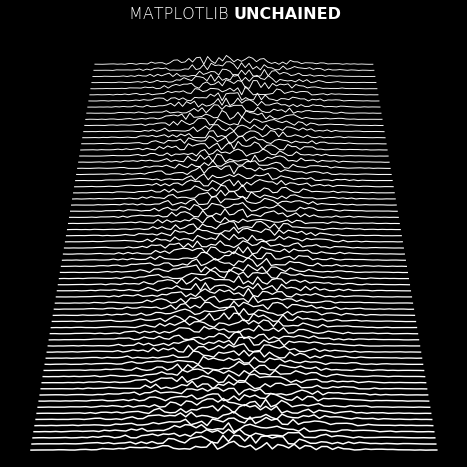

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


# Create new Figure with black background
fig = plt.figure(figsize=(8, 8), facecolor='black')

# Add a subplot with no frame
ax = plt.subplot(111, frameon=False)

# Generate random data
data = np.random.uniform(0, 1, (64, 75))
X = np.linspace(-1, 1, data.shape[-1])
G = 1.5 * np.exp(-4 * X ** 2)

# Generate line plots
lines = []
for i in range(len(data)):
    # Small reduction of the X extents to get a cheap perspective effect
    xscale = 1 - i / 200.
    # Same for linewidth (thicker strokes on bottom)
    lw = 1.5 - i / 100.0
    line, = ax.plot(xscale * X, i + G * data[i], color="w", lw=lw)
    lines.append(line)

# Set y limit (or first line is cropped because of thickness)
ax.set_ylim(-1, 70)

# No ticks
ax.set_xticks([])
ax.set_yticks([])

# 2 part titles to get different font weights
ax.text(0.5, 1.0, "MATPLOTLIB ", transform=ax.transAxes,
        ha="right", va="bottom", color="w",
        family="sans-serif", fontweight="light", fontsize=16)
ax.text(0.5, 1.0, "UNCHAINED", transform=ax.transAxes,
        ha="left", va="bottom", color="w",
        family="sans-serif", fontweight="bold", fontsize=16)


def update(*args):
    # Shift all data to the right
    data[:, 1:] = data[:, :-1]

    # Fill-in new values
    data[:, 0] = np.random.uniform(0, 1, len(data))

    # Update data
    for i in range(len(data)):
        lines[i].set_ydata(i + G * data[i])

    # Return modified artists
    return lines

# Construct the animation, using the update function as the animation director.
anim = animation.FuncAnimation(fig, update, interval=10)
plt.show()

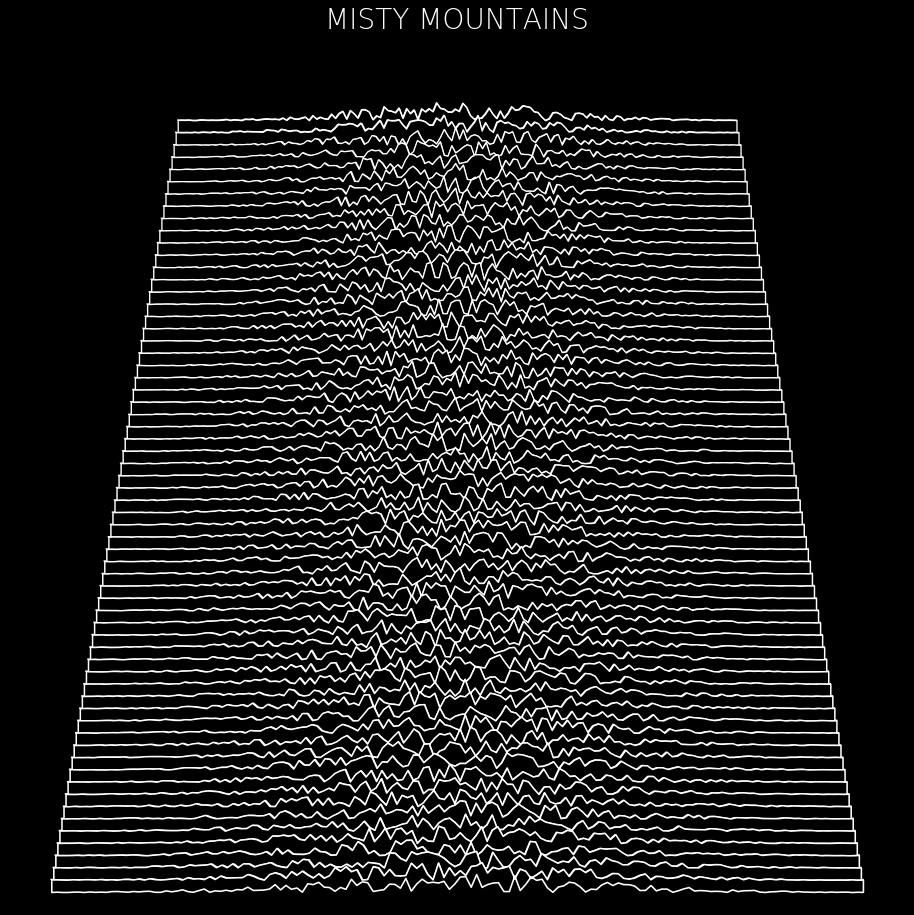

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
import math

# Fixing random state for reproducibility
np.random.seed(19662821)

# Create new Figure with black background
fig = plt.figure(figsize=(16, 16), facecolor='black')

# Add a subplot with no frame
ax = plt.subplot(111, frameon=False)

# Generate random data
#data = np.random.normal(0.2, 0.25, (64, 150))
data = []
for i in range(64):
    data.append(np.random.uniform(0, 1., 150))
X = np.linspace(-1, 1, 150)
G = 1.5 * np.exp(-4 * X ** 2)

# Generate line plots
lines = []
for i in range(len(data)-1, 0, -1): # draw from back to front
    # Small reduction of the X extents to get a cheap perspective effect
    xscale = 1 - i / 200.
    # Same for linewidth (thicker strokes on bottom)
    lw = 1.6 - i / 200.0
    line = ax.plot(xscale * X, i + G * data[i], color="w", lw=lw)
    if i>0 and i<len(data):
        ax.fill_between(xscale * X, i + G * data[i],  i-1 + G * data[i-1], lw=lw,
                        edgecolor='white', facecolor='black', zorder = len(data)-i+1)
    lines.append(line)

# Set y limit (or first line is cropped because of thickness)
ax.set_ylim(-1, 70)

# No ticks
ax.set_xticks([])
ax.set_yticks([])

# titles
ax.text(0.5, 1.0, "MISTY MOUNTAINS", transform=ax.transAxes,
        ha="center", va="bottom", color="w",
        family="sans-serif", fontweight="light", fontsize=28)

plt.show()

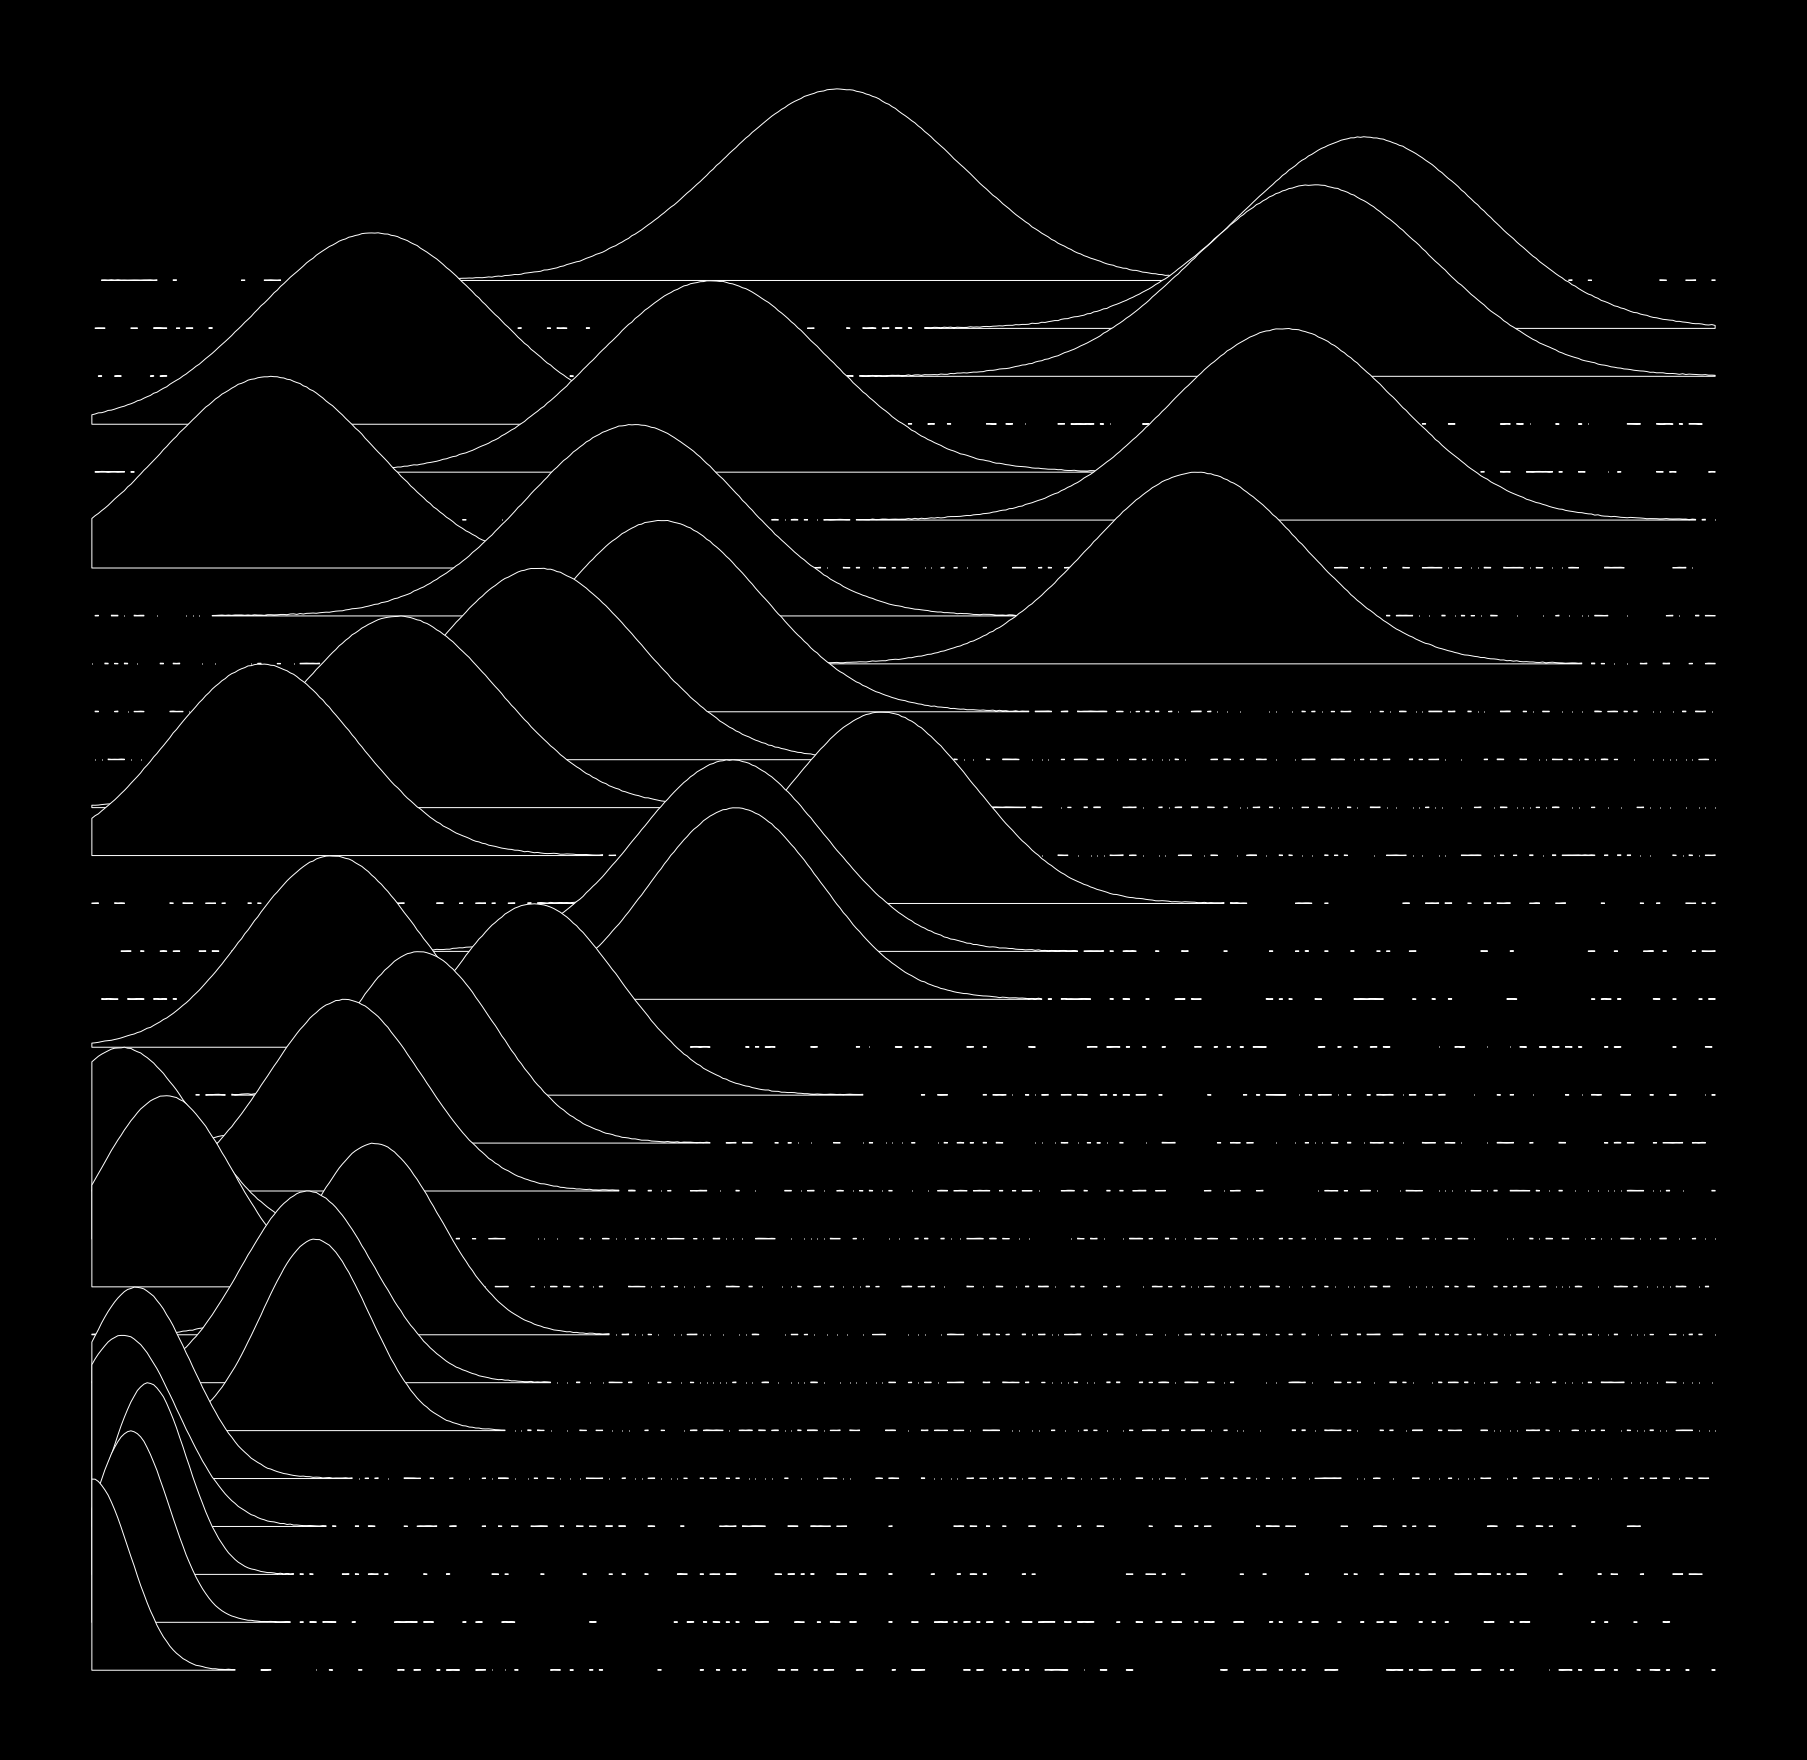

In [45]:
import numpy as np
import pylab as plt
import itertools

k = 30
X = np.linspace(0, 30, 500)
Y = np.zeros((k, X.size))

# Add some fake data
MU = np.random.random(k)
for n in xrange(k):
    Y[n] += np.exp(-(X-MU[n]*n)**2 / (1+n/3))
Y *= 500

# Add some outliers for show
Y += 2*np.random.random(Y.shape)

displace = Y.max()/4

# Add a cutoff
Y[Y<1.0] = None

face_colors = itertools.cycle(["#D3D820", "#C9CC54", 
                               "#D7DA66", "#FDFE42"])

fig = plt.figure(figsize=(32, 32), facecolor='black')
ax = fig.add_subplot(111, facecolor='black')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

for n,y in enumerate(Y):
    # Vertically displace each plot
    y0 = np.ones(y.shape) * n * displace
    y1 = y + n*displace

    plt.fill_between(X, y0,y1,lw=1,
                     #facecolor=face_colors.next(),
                     facecolor='black', edgecolor='white',
                     zorder=len(Y)-n)
    #plt.fill(X, y0, y1, lw=1)
plt.show()

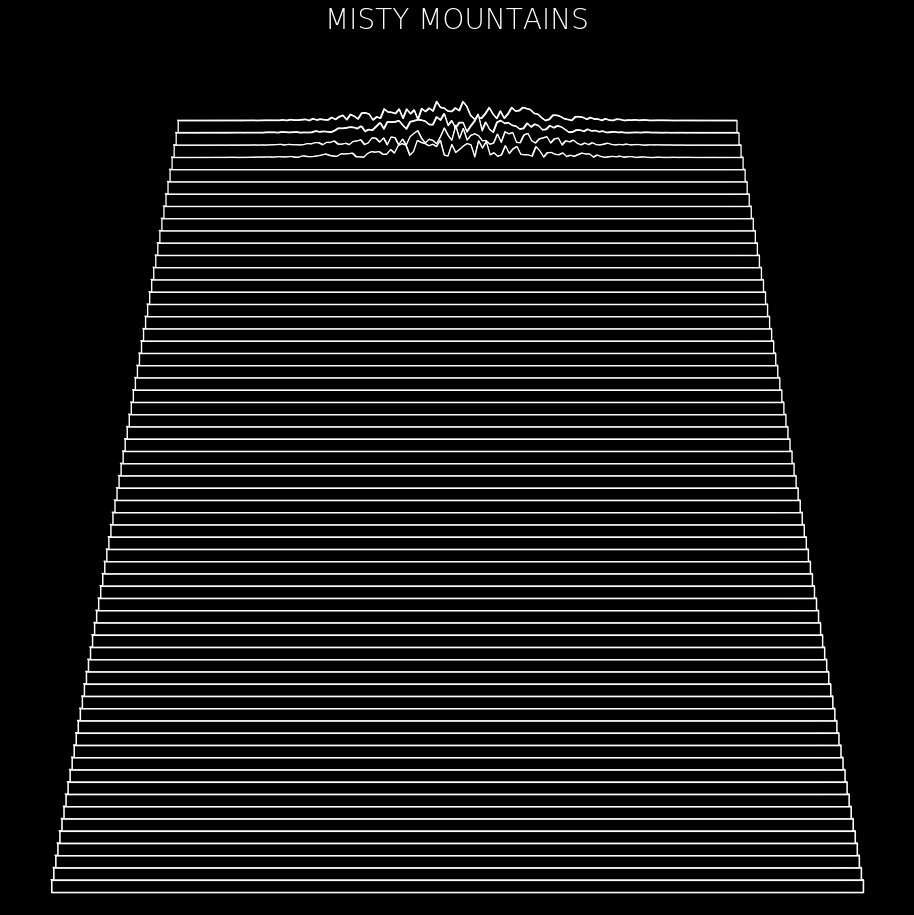

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
import math

# Fixing random state for reproducibility
np.random.seed(19662821)

# Create new Figure with black background
fig = plt.figure(figsize=(16, 16), facecolor='black')

# Add a subplot with no frame
ax = plt.subplot(111, frameon=False)

# Generate random data
#data = np.random.normal(0.2, 0.25, (64, 150))
#data = []
#for i in range(64):
#    data.append(np.random.uniform(0, 1.1, 150))
X = np.linspace(-2, 2, 150)
G = 1.5 * np.exp(-2 * X ** 2)

# see https://en.wikipedia.org/wiki/Perlin_noise
# Function to linearly interpolate between a0 and a1
# Weight w should be in the range [0.0, 1.0]
def lerp(a0, a1, w):
    return a0 + w*(a1 - a0) # equivalent to return (1.0 - w)*a0 + w*a1

# Computes the dot product of the distance and gradient vectors.
def dotGridGradient(ix, iy, x, y, grad): # Precomputed (or otherwise) gradient vectors at each grid node
    # Compute the distance vector
    dx = x - float(ix)
    dy = y - float(iy)
    # Compute the dot-product
    
    return dx*grad[ix][iy+1] + dy*grad[ix+1][iy]

# Compute Perlin noise at coordinates x, y
def perlin(x, y, grad):
    # Determine grid cell coordinates
    x0 = int(x)
    x1 = x0 + 1
    y0 = int(y)
    y1 = y0 + 1
    # Determine interpolation weights
    # Could also use higher order polynomial/s-curve here
    sx = x - float(x0)
    sy = y - float(y0)
    # Interpolate between grid point gradients
    n0 = dotGridGradient(x0, y0, x, y, grad)
    n1 = dotGridGradient(x1, y0, x, y, grad)
    ix0 = lerp(n0, n1, sx)
    n0 = dotGridGradient(x0, y1, x, y, grad)
    n1 = dotGridGradient(x1, y1, x, y, grad)
    ix1 = lerp(n0, n1, sx)
    value = lerp(ix0, ix1, sy)

    return value
 
data = np.zeros((64, 150))
for i in range(64):
    data[i] = np.random.uniform(0, 1.1, 150)
grad = np.zeros((64, 150))
for ix in range(64):
    for iy in range(150):
        if ix<63 and iy<149:
            grad[ix][iy] = (data[ix][iy] - data[ix+1][iy+1]) / 2.
for ix in range(60):
    for iy in range(145):
        data[ix][iy] = perlin(ix, iy, grad)
        #print("%1.5f" % perlin(3, 42, grad))

# Generate line plots
lines = []
for i in range(len(data)-1, 0, -1): # draw from back to front
    # Small reduction of the X extents to get a cheap perspective effect
    xscale = 1 - i / 200.
    # Same for linewidth (thicker strokes on bottom)
    lw = 1.6 - i / 200.0
    line = ax.plot(xscale * X, i + G * data[i], color="w", lw=lw)
    if i>0 and i<len(data):
        ax.fill_between(xscale * X, i + G * data[i],  i-1 + G * data[i-1], lw=lw,
                        edgecolor='white', facecolor='black', zorder = len(data)-i+1)
    lines.append(line)

# Set y limit (or first line is cropped because of thickness)
ax.set_ylim(-1, 70)

# No ticks
ax.set_xticks([])
ax.set_yticks([])

# titles
ax.text(0.5, 1.0, "MISTY MOUNTAINS", transform=ax.transAxes,
        ha="center", va="bottom", color="w",
        family="sans-serif", fontweight="light", fontsize=28)

plt.show()

In [15]:
# n=S(n)+P(n)

def sss(n):
    sn = str(n)
    ln = len(sn)-1
    res = 0
    for k in range(ln,-1,-1):
        res += int(sn[k])
    return res

def ppp(n):
    sn = str(n)
    ln = len(sn)-1
    res = 1
    for k in range(ln,-1,-1):
        res *= int(sn[k])
    return res

def floorsum(n):
    sn = str(n)
    ln = len(sn)
    res = 0
    for k in range(1,ln):
        res += int(n / 10**k)
    return res

if __name__=='__main__':
    for n in range(1, 1000):
        if 9*floorsum(n) == ppp(n):
            print n

19
29
39
49
59
69
79
89
99


In [39]:
import numpy as np

# see https://en.wikipedia.org/wiki/Perlin_noise
# Function to linearly interpolate between a0 and a1
# Weight w should be in the range [0.0, 1.0]
def lerp(a0, a1, w):
    return a0 + w*(a1 - a0) # equivalent to return (1.0 - w)*a0 + w*a1

# Computes the dot product of the distance and gradient vectors.
def dotGridGradient(ix, iy, x, y, grad): # Precomputed (or otherwise) gradient vectors at each grid node
    # Compute the distance vector
    dx = x - float(ix)
    dy = y - float(iy)
    # Compute the dot-product
    
    return dx*grad[ix][iy+1] + dy*grad[ix+1][iy]

# Compute Perlin noise at coordinates x, y
def perlin(x, y, grad):
    # Determine grid cell coordinates
    x0 = int(x)
    x1 = x0 + 1
    y0 = int(y)
    y1 = y0 + 1
    # Determine interpolation weights
    # Could also use higher order polynomial/s-curve here
    sx = x - float(x0)
    sy = y - float(y0)
    # Interpolate between grid point gradients
    n0 = dotGridGradient(x0, y0, x, y, grad)
    n1 = dotGridGradient(x1, y0, x, y, grad)
    ix0 = lerp(n0, n1, sx)
    n0 = dotGridGradient(x0, y1, x, y, grad)
    n1 = dotGridGradient(x1, y1, x, y, grad)
    ix1 = lerp(n0, n1, sx)
    value = lerp(ix0, ix1, sy)

    return value
 
if __name__ == '__main__':
    data = np.zeros((64, 150))
    for i in range(64):
        data[i] = np.random.normal(0, 1.1, 150)
    grad = np.zeros((64, 150))
    for ix in range(64):
        for iy in range(150):
            if ix<63 and iy<149:
                grad[ix][iy] = (data[ix][iy] - data[ix+1][iy+1]) / 2.
    for ix in range(60):
        for iy in range(145):
            data[ix][iy] = perlin(ix, iy, grad)
            #print("%1.5f" % perlin(3, 42, grad))
    print data

[[ 0.          0.          0.         ... -1.17629873 -0.56807085
   1.18717242]
 [ 0.          0.          0.         ... -1.05138249  0.94748994
   1.85498898]
 [ 0.          0.          0.         ... -0.3822907  -0.25965474
  -1.66373795]
 ...
 [-1.18747678 -0.09754688  0.27739212 ...  1.33627581  1.04804583
  -0.11591576]
 [-0.65453023 -0.16024896  1.16008509 ... -1.01869268  0.89097329
  -0.26182842]
 [-0.10469681 -2.61583119  0.22115911 ...  0.12740859  0.69259378
  -0.59646743]]


In [9]:
import numpy as np
import os

os.chdir('C:\Users\Bernie\Desktop')
fname = 'mm0.csv'
#arr = np.fromfile(fname, dtype=float, sep=',')
#print arr
np.loadtxt(fname, delimiter=',')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Text(0.5,1,'MISTY MOUNTAINS')

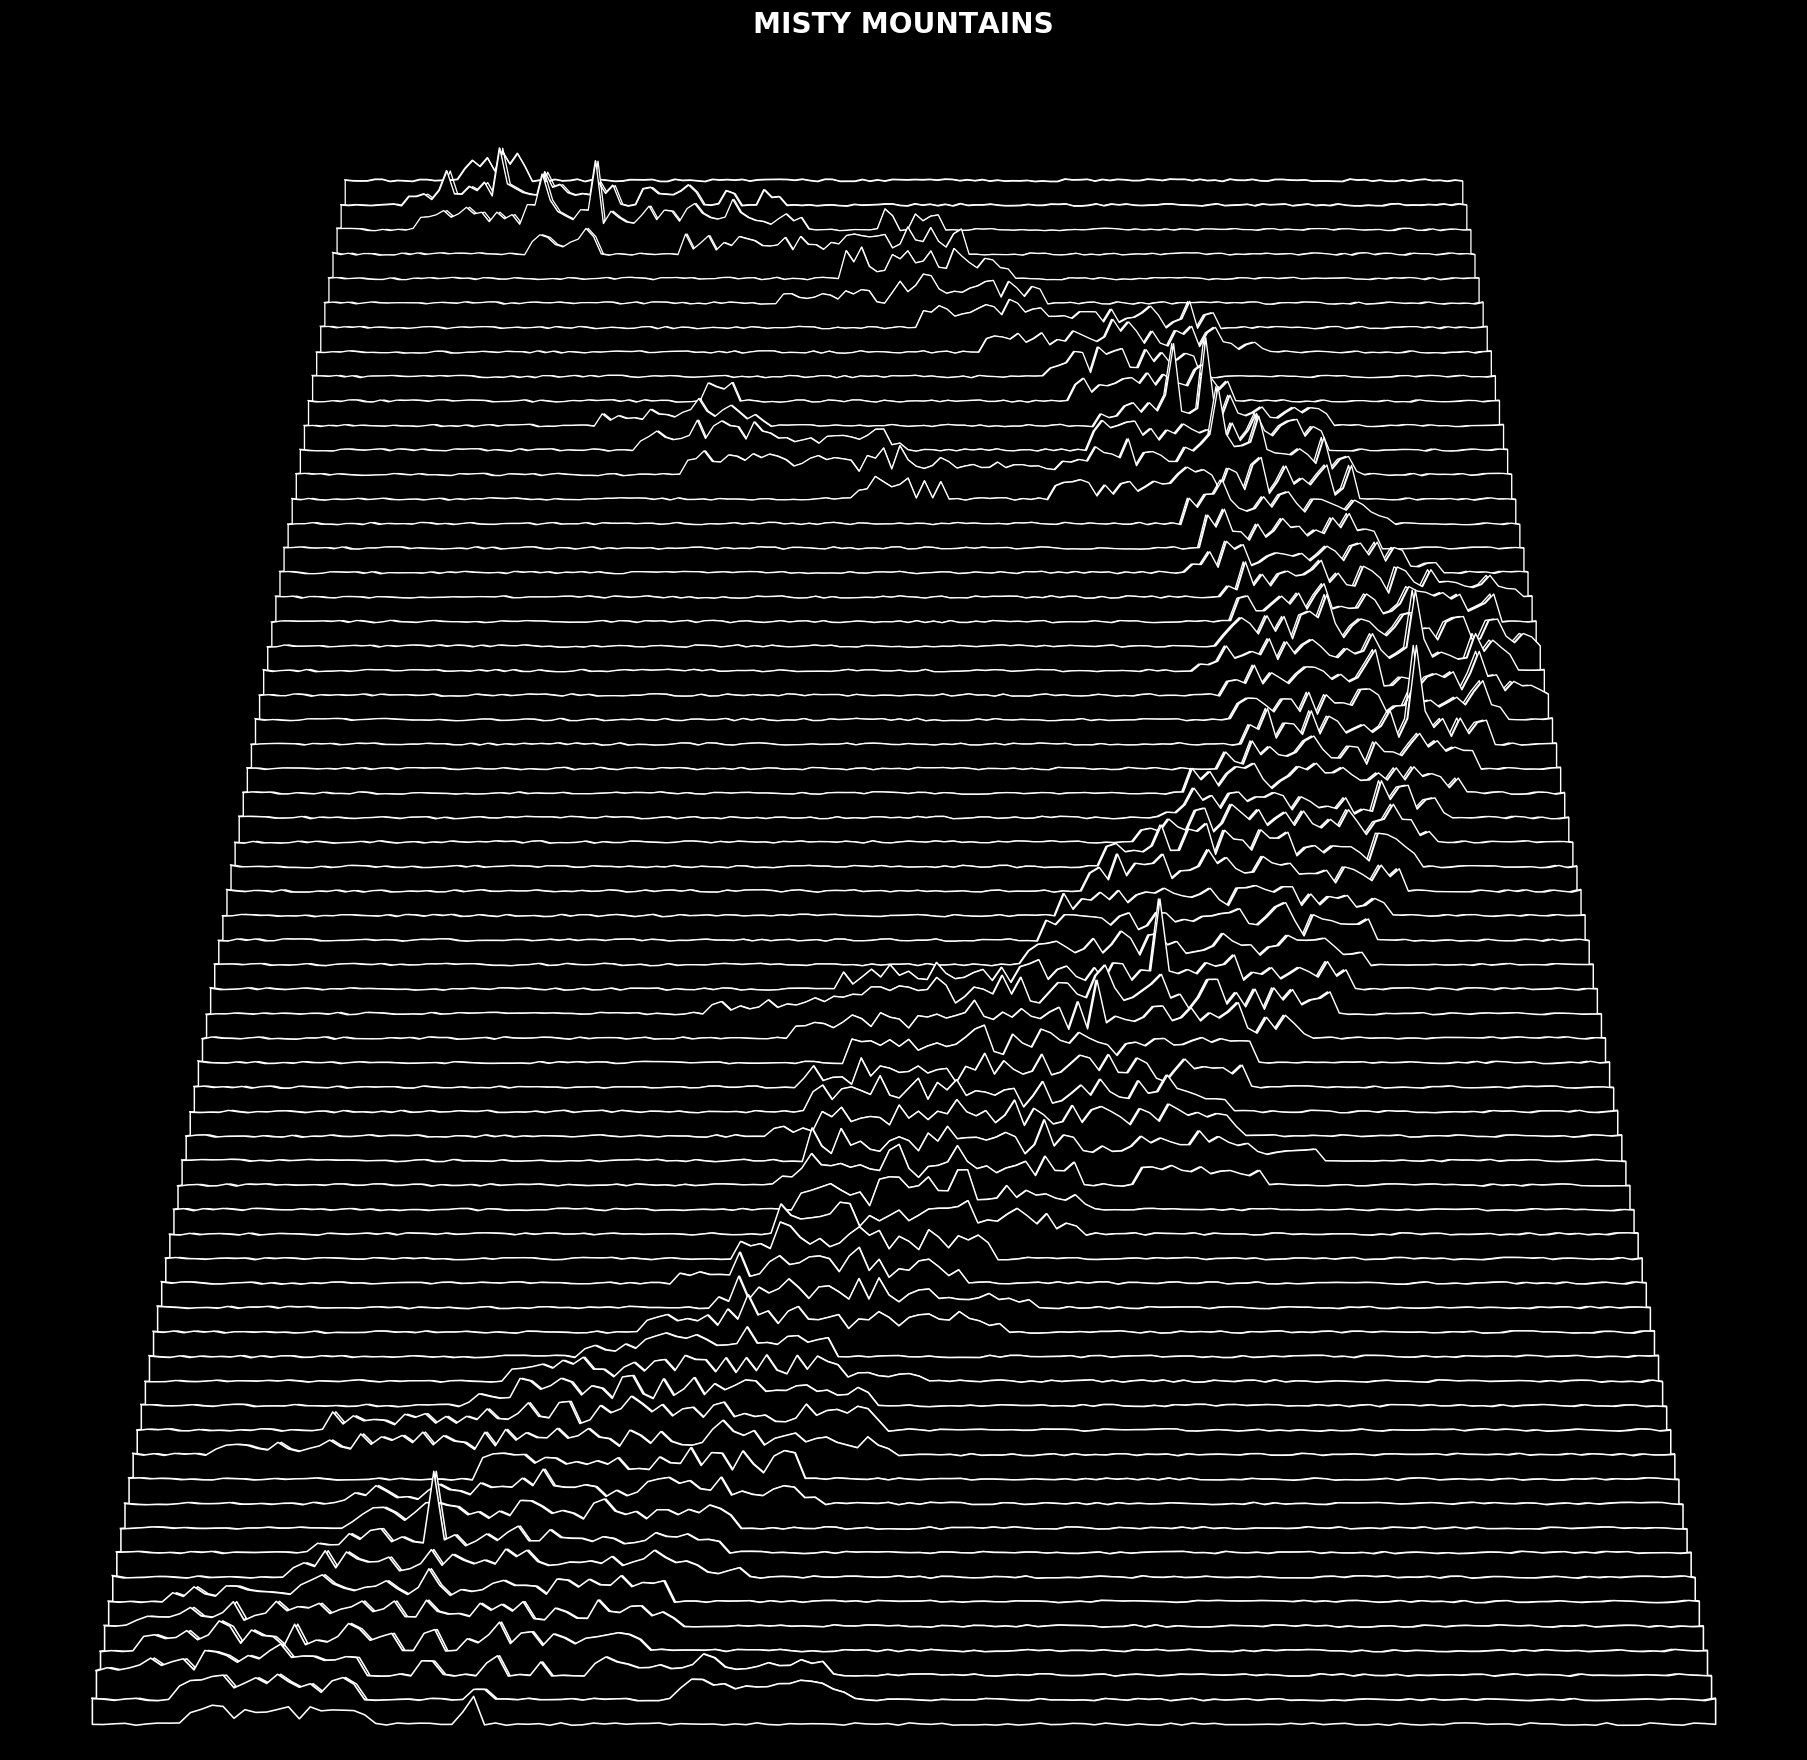

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
import math
import os

# Fixing random state for reproducibility
np.random.seed(19662821)

# Create new Figure with black background
fig = plt.figure(figsize=(32, 32), facecolor='black')

# Add a subplot with no frame
ax = plt.subplot(111, frameon=False)

# Generate random data
#data = np.random.normal(0.2, 0.25, (64, 150))
#data = []
#for i in range(64):
#    data.append(np.random.uniform(0, 1.1, 150))
X = np.linspace(-2, 2, 150)
G = 1.5 * np.exp(-2 * X ** 2)
 
data = np.zeros((64, 150))
os.chdir('C:\Users\Bernie\Desktop')
fname = 'mm1.csv'
data = np.loadtxt(fname, delimiter=',')
data = np.flip(data, axis=0)
#for i in range(64):
#    data[i] = np.random.uniform(0, 1.1, 150)
#grad = np.zeros((64, 150))
xc = range(150)
for ix in range(64):
    iymean = 150. - np.dot(xc, data[ix][:]) / np.sum(data[ix][:])
    #print iymean
    for iy in range(150):
        dsum = data[max(ix-1,0)][iy] + data[ix][iy] + data[min(ix+1,63)][iy]
        data[ix][iy] *= random.triangular(0.1, 0.55*dsum*np.exp(-0.000015*(iymean-ix)**2))
        data[ix][iy] += random.random() * 0.1

# Generate line plots
lines = []
for i in range(len(data)-1, 0, -1): # draw from back to front
    # Small reduction of the X extents to get a cheap perspective effect
    xscale = 1 - i / 200.
    # Same for linewidth (thicker strokes on bottom)
    lw = 1.6 - i / 200.0
    line = ax.plot(xscale * X, i + data[i], color="w", lw=lw)
    if i>0 and i<len(data):
        ax.fill_between(xscale * X, i + data[i],  i-1 + data[i-1], lw=lw,
                        edgecolor='white', facecolor='black', zorder = len(data)-i+1)
    lines.append(line)

# Set y limit (or first line is cropped because of thickness)
ax.set_ylim(-1, 70)

# No ticks
ax.set_xticks([])
ax.set_yticks([])

# titles
ax.text(0.5, 1.0, "MISTY MOUNTAINS", transform=ax.transAxes,
        ha="center", va="top", color="w",
        family="sans-serif", fontweight="bold", fontsize=28)

In [6]:
# triangle numbers

def trgl(n):
    return n*(n+1)/2

def trglsum(n):
    res = 0.
    for k in range(1, n):
        res += 1. / trgl(k)
    return res

if __name__=='__main__':
    print trglsum(10000)

1.9998
